# Week 10: 資料兼課題

## 0. この資料の目標

### トピック

今週の授業では，最適消費モデルを解きます。来週，2期間の最適消費モデルを学ぶので，その準備です。

- ソローモデル → 貯蓄率が外生（一定）
- 最適消費モデル → 貯蓄率が内生

### 戦略

経済学のモデル構築＆分析の戦略は，

- 手計算でも解きやすいモデルを作って，数値によらない普遍性のある現象理解を目指す，
- どうしても解けない場合には数値的に解いてシミュレーションする

というのが基本です。数値的な計算というのは，あらゆるパラメータに数値を代入する必要があるので，特定のパラメータに対する観察をするだけなので，一般論に発展させることが難しいのです。

手計算で解ける問題の多くは，コンピュータでもシンボリックに（パラメータに数を代入せずに）解けますので，上記戦略のアナロジーとして，次のような手順を考えます。

- 手計算でも解きやすいモデルを作ってシンボリックな解表現を得る。
- 最後に数値を代入，必要ならば数値最適化をして，モデルをシミュレーションする。

### 課題

課題に答えながらノートを完成させてください。第10週のリアルタイムセッションに参加している方は，授業内で取り組みます。

- コードの一部が `_______` となっているものがあります。これは「穴埋め」問題です。適切なコードに書き換えて実行してください。
- `assert` から始まる文は書いたコードが期待通り動いているかをチェックするためのテスト用コードです。消さないでください。期待通り動いている場合は何も起こりません。
- コードの中には前後に依存関係のあるものがあります。すべてのコードを上から順に実行してください。

### 提出方法

MS Teams の対応する課題に ipynb ファイルを添付して提出する。  

- 提出前に Kernel > Restart Kernel and Run All Cells... を実行して，エラーが生じないことを確認してください。

### 締切

2020/7/16

### 準備

まず，必要なライブラリをインポートしてください。

- sympy - シンボリック計算のためのライブラリ
- scipy.optimize - 数値最適化のためのライブラリ（関数がゼロになる点を探す `newton` と `fsolve` を紹介する）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

SymPy を使うときには次のコードを実行しておくと，数式がきれいに表示される。

In [2]:
sp.init_printing()

図の画質を上げるために次のコードを実行しておきます。Word ファイルにドラッグ&ドロップで貼り付ける場合などに便利です。  
※ dpi = dot per inch, 1インチにどれだけの点を打つか。

In [3]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150

## I. SymPy を使う

### シンボルの定義

In [4]:
from sympy.abc import x, y

x + y**2

In [6]:
a, b = sp.symbols("a, b")
a ** b

In [7]:
lamda = sp.symbols("lamda")    # lambda ではない
lamda

#### 課題

シンボルで表現せよ。

$$
x^\alpha y^{1-\alpha}
$$

In [8]:
## EXERCISE ##

alpha = sp.symbols("alpha")
x**alpha * y**(1 - alpha)

#### 課題

シンボル計算を用いて証明せよ。

$$
x^2 + 2b x + b^2 = (x + b)^2
$$

In [11]:
## EXERCISE ##

((x**2 + 2 * b * x + b**2) - (x + b)**2).simplify()

### 方程式を解く

$f(x) = 0 $ を解くときには，

```python
sp.solve(f, x)
```

というコマンドを使います。結果は解のリストになります。


#### 2次方程式

解きなさい。

$$
a x^2 + bx + c = 0
$$

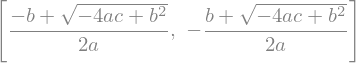

In [12]:
## EXERCISE ##

from sympy.abc import a, b, c, x
sp.solve(a * x**2 + b * x + c, x)

#### 3次方程式

次の3次方程式を解きなさい。

$$
3x^3 + x^2 - 10x= 0
$$

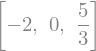

In [18]:
## EXERCISE ##

sp.solve(3 * x**3 + x**2 - 10 * x, x)

### 微分

微分はシンボリックに計算できる。シンボルで定義された式に対して `diff()` というメソッドを使う。

In [20]:
## EXERCISE ##
f = x**a * y **b
f

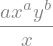

In [21]:
f.diff(x)

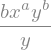

In [22]:
f.diff(y)

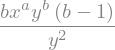

In [23]:
f.diff(y, 2)

`simplify()` でシンプルにできる。

In [24]:
## EXERCISE ##
f.diff(x).simplify()

#### CRRA型効用関数

$$
u(c) = \frac{c^{1-\theta} - 1}{1 - \theta}
$$

をCRRA型効用関数という。CRRA = Constant Relative Risk Aversion。

RRA （相対的危険回避度）とは，限界効用の弾力性のことで，

$$
\frac{-cu''}{u'}
$$

で定義される。

#### 課題

上で定義されるCRRA型効用関数の RRA が定数であることをシンボリック計算を使って確認しなさい。

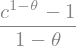

In [25]:
## EXERCISE ##

theta, c = sp.symbols("theta, c")
u = (c**(1 - theta) - 1) / (1 - theta)
u

In [27]:
(- c * u.diff(c, 2) / u.diff(c)).simplify()

### 数値の代入

2次方程式の解

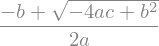

In [28]:
s1, s2 = sp.solve(a * x**2 + b * x + c, x)
s1

$a=1$, $b=2$, $c=1$ を代入した結果を知りたいとしよう。こういうときには `subs()` というメソッドを使う。引数として辞書を渡す。`a`, `b`, `c` というシンボルが辞書のキーになる。代入したい値が辞書の値になる。

In [29]:
s1.subs({a: 1, b: 2, c: 1})

In [31]:
[s.subs({a: 1, b: 2, c:2}) for s in sp.solve(a * x**2 + b * x + c, x)]

全部のパラメータでなく，一部だけ代入することもできる。

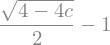

In [32]:
s1.subs({a:1, b:2})

これは `c` の関数のように見える。`c` の関数として使いたい場合。`lambdify()` を使う。

In [33]:
s1_func = sp.lambdify(c, s1.subs({a: 1, b: 2}))
s1_func(np.array([1, -2,  - 3]))

array([-1.        ,  0.73205081,  1.        ])

### ソローモデルの定常状態

$$
sf(k) = (\delta + g + n + gn) k 
$$

コブ=ダグラス型 $f(k) = k^\alpha$ のとき，定常状態 $k^*$ を $s$, $\delta$, $g$, $n$, $\alpha$ で表現しなさい。

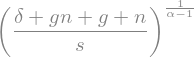

In [35]:
## EXERCISE ## 

s, k, alpha, delta, g, n = sp.symbols("s, k, alpha, delta, g, n")
kstar = sp.solve(s * k**alpha - (delta + g + n + g * n ) * k, k)[0]
kstar

#### 問題

$k^* = k^*(s)$ をプロットしてください。$0 < s < 1$

In [38]:
## EXERCISE ##

params = { alpha: 0.3, delta: 0.05, g: 0.03, n: 0.01 }
ks = sp.lambdify(s, kstar.subs(params))

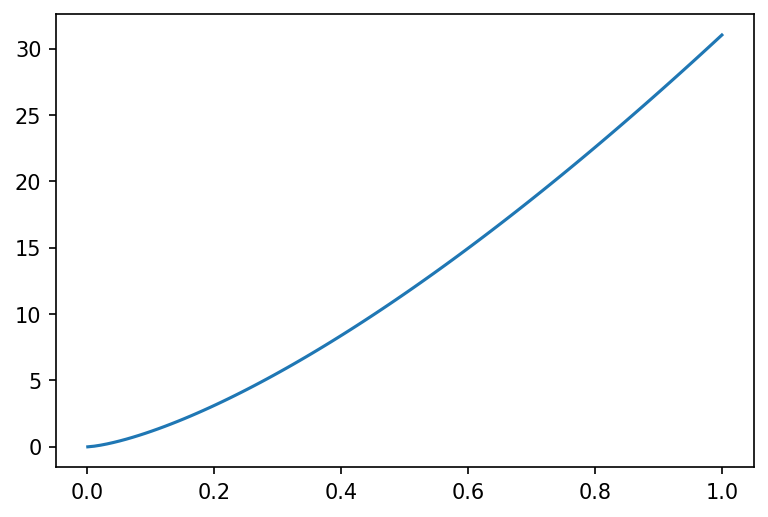

In [40]:
s_grid = np.linspace(0.001, 1, 100)
plt.plot(s_grid, ks(s_grid))

#### 効用最大化問題

$$
\max_{x,y} x^{1/3} y^{2/3} \quad \text{s.t.} \quad x + 3 y = 100
$$

これを解くためには，

$$
\mathcal{L} = x^{1/3} y^{2/3} + \lambda (100 - x - 3y)
$$

を最大にする $x$, $y$, $\lambda$ を求めればよい。

（制約付き最大化問題が制約なしの最大化問題に変換された）

シンボリックに解いてみよう。

In [ ]:
## EXERCISE ##

In [53]:
lamda = sp.symbols("lamda")

L = x**(1 / 3) * y**(2 / 3) + lamda * (100 - x - 3 * y)
L

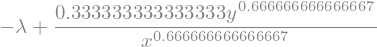

In [54]:
L.diff(x)

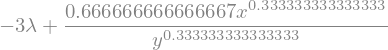

In [55]:
L.diff(y)

In [56]:
sp.solve([L.diff(x), L.diff(y), L.diff(lamda)], x, y, lamda)

### 連立方程式の解き方

$$
\begin{aligned}
 ax + y &= 3\\
 x + by &= 0
\end{aligned}
$$

$$
\begin{aligned}
 ax + y - 3&= 0\\
 x + by &= 0
\end{aligned}
$$

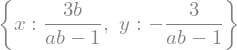

In [42]:
sp.solve([a * x + y - 3, x + b * y], x, y)